In [5]:
import yfinance as yf
import numpy as np

# Define the stock symbol and time period
symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Get historical stock data
data = yf.download(symbol, start=start_date, end=end_date)

# Extract the adjusted close prices
prices = data['Adj Close'].values

# Set the parameters for the value iteration
discount_factor = 0.95
iterations = 100

# Initialize the value function and policy arrays
num_states = len(prices)
value_function = np.zeros(num_states)
policy = np.zeros(num_states)

# Perform value iteration
for i in range(iterations):
    for state in range(num_states):
        max_value = float('-inf')
        for action in range(-5, 6):
            next_state = state + action
            if next_state < 0 or next_state >= num_states:
                continue
            value = prices[state] + discount_factor * value_function[next_state]
            if value > max_value:
                max_value = value
                policy[state] = action
        value_function[state] = max_value

# Print the optimal policy
print("Optimal Policy:")
for state in range(num_states):
    print(f"State {state}: Action {policy[state]}")


[*********************100%***********************]  1 of 1 completed
Optimal Policy:
State 0: Action 0.0
State 1: Action -1.0
State 2: Action -2.0
State 3: Action -3.0
State 4: Action -4.0
State 5: Action -5.0
State 6: Action -5.0
State 7: Action -5.0
State 8: Action -2.0
State 9: Action -3.0
State 10: Action -4.0
State 11: Action -5.0
State 12: Action -5.0
State 13: Action -4.0
State 14: Action -5.0
State 15: Action -5.0
State 16: Action -5.0
State 17: Action -5.0
State 18: Action -5.0
State 19: Action -5.0
State 20: Action -5.0
State 21: Action -2.0
State 22: Action -3.0
State 23: Action -4.0
State 24: Action -5.0
State 25: Action -4.0
State 26: Action -5.0
State 27: Action -5.0
State 28: Action -2.0
State 29: Action -3.0
State 30: Action -4.0
State 31: Action -5.0
State 32: Action -2.0
State 33: Action -3.0
State 34: Action -4.0
State 35: Action -5.0
State 36: Action -5.0
State 37: Action -5.0
State 38: Action -5.0
State 39: Action -5.0
State 40: Action -4.0
State 41: Action -5.0
St

[*********************100%***********************]  1 of 1 completed


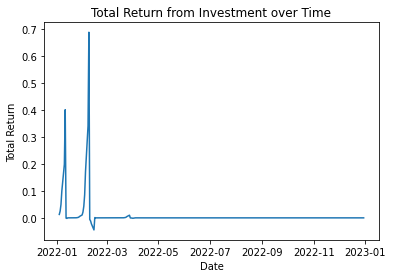

In [6]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the stock symbol and time period
symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Get historical stock data
data = yf.download(symbol, start=start_date, end=end_date)

# Extract the adjusted close prices
prices = data['Adj Close'].values

# Set the parameters for the value iteration
discount_factor = 0.95
iterations = 100

# Initialize the value function and policy arrays
num_states = len(prices)
value_function = np.zeros(num_states)
policy = np.zeros(num_states, dtype=np.int8)  # Updated to store buy/sell actions

# Perform value iteration
for i in range(iterations):
    for state in range(num_states):
        max_value = float('-inf')
        for action in [0, 1]:  # 0 represents sell, 1 represents buy
            next_state = state + 1 if action == 1 else state
            if next_state >= num_states:
                continue
            value = prices[state] + discount_factor * value_function[next_state]
            if value > max_value:
                max_value = value
                policy[state] = action
        value_function[state] = max_value

# Calculate the total return from the investment
total_return = np.cumprod([1 + (prices[state] * (1 if policy[state] == 1 else -1) / prices[state-1]) for state in range(1, num_states)])

# Plot the total return over time
plt.plot(data.index[1:], total_return)
plt.xlabel("Date")
plt.ylabel("Total Return")
plt.title("Total Return from Investment over Time")
plt.show()


[*********************100%***********************]  1 of 1 completed


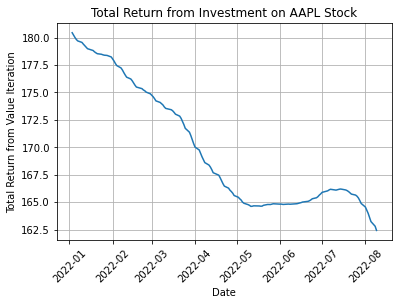

In [10]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the stock symbol and fetch historical data for the year 2022
stock_symbol = 'AAPL'  # Replace with your desired stock symbol
start_date = '2022-01-01'
end_date = '2022-12-31'
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)['Adj Close']

# Value Iteration function
def value_iteration(stock_data, discount_factor=0.9, iterations=100):
    num_states = len(stock_data)
    values = np.zeros(num_states)
    for _ in range(iterations):
        new_values = np.zeros(num_states)
        for state in range(num_states):
            max_value = -np.inf
            for action in range(state+1, num_states):
                value = stock_data[state] * (discount_factor ** (action - state - 1)) + values[action]
                if value > max_value:
                    max_value = value
            new_values[state] = max_value
        values = new_values
    return values

# Run value iteration on stock data
values = value_iteration(stock_data)

# Plotting the total return from the investment
dates = stock_data.index
returns = np.zeros(len(stock_data))
for i in range(len(stock_data)):
    returns[i] = stock_data[0] * (values[i] / values[0])

plt.plot(dates, returns)
plt.title('Total Return from Investment on AAPL Stock')
plt.xlabel('Date')
plt.ylabel('Total Return from Value Iteration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


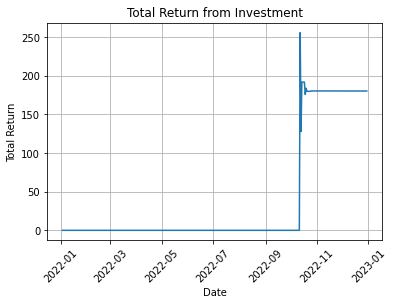

In [11]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the stock symbol and fetch historical data for the year 2022
stock_symbol = 'AAPL'  # Replace with your desired stock symbol
start_date = '2022-01-01'
end_date = '2022-12-31'
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)['Adj Close']

# Value Iteration function
def value_iteration(stock_data, discount_factor=0.9, iterations=100):
    num_states = len(stock_data)
    values = np.zeros((num_states, 3))  # 3 actions: 0 - hold, 1 - buy, 2 - sell

    for _ in range(iterations):
        new_values = np.zeros((num_states, 3))
        for state in range(num_states):
            max_value = -np.inf
            for action in range(3):  # 0 - hold, 1 - buy, 2 - sell
                if action == 0:  # hold
                    value = stock_data[state] + discount_factor * values[state, action]
                elif action == 1:  # buy
                    value = 0
                    for i in range(state+1, num_states):
                        value += stock_data[i] - stock_data[state] + discount_factor * values[i, action]
                else:  # sell
                    value = 0
                    for i in range(state+1, num_states):
                        value += stock_data[state] - stock_data[i] + discount_factor * values[i, action]
                
                if value > max_value:
                    max_value = value
            new_values[state] = max_value
        values = new_values
    return values

# Run value iteration on stock data
values = value_iteration(stock_data)

# Plotting the total return from the investment
dates = stock_data.index
returns = np.zeros(len(stock_data))
for i in range(len(stock_data)):
    returns[i] = stock_data[0] + values[i, 1] - values[i, 2]  # Total return = Initial investment + sum of buy-sell differences

plt.plot(dates, returns)
plt.title('Total Return from Investment')
plt.xlabel('Date')
plt.ylabel('Total Return')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


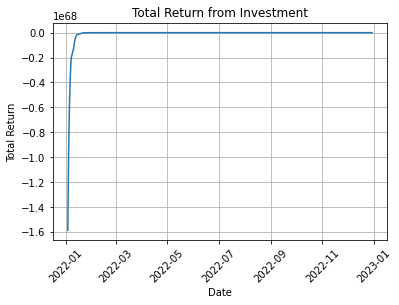

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the stock symbol and fetch historical data for the year 2022
stock_symbol = 'AAPL'  # Replace with your desired stock symbol
start_date = '2022-01-01'
end_date = '2022-12-31'
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)['Adj Close']

# Value Iteration function
def value_iteration(stock_data, discount_factor=0.9, iterations=100, convergence_threshold=1e-8):
    num_states = len(stock_data)
    num_actions = 3  # 0 - hold, 1 - buy, 2 - sell
    values = np.zeros((num_states, num_actions))
    new_values = np.copy(values)

    for _ in range(iterations):
        for state in range(num_states):
            for action in range(num_actions):
                if action == 0:  # hold
                    new_values[state, action] = stock_data[state] + discount_factor * values[state, action]
                elif action == 1:  # buy
                    value = 0
                    for i in range(state+1, num_states):
                        value += stock_data[i] - stock_data[state] + discount_factor * values[i, action]
                    new_values[state, action] = value
                else:  # sell
                    value = 0
                    for i in range(state+1, num_states):
                        value += stock_data[state] - stock_data[i] + discount_factor * values[i, action]
                    new_values[state, action] = value
        
        if np.max(np.abs(new_values - values)) < convergence_threshold:
            break
        
        values = np.copy(new_values)

    return values

# Run value iteration on stock data
values = value_iteration(stock_data)

# Plotting the total return from the investment
dates = stock_data.index
returns = np.zeros(len(stock_data))
for i in range(len(stock_data)):
    returns[i] = stock_data[0] + values[i, 1] - values[i, 2]  # Total return = Initial investment + sum of buy-sell differences

plt.plot(dates, returns)
plt.title('Total Return from Investment')
plt.xlabel('Date')
plt.ylabel('Total Return')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


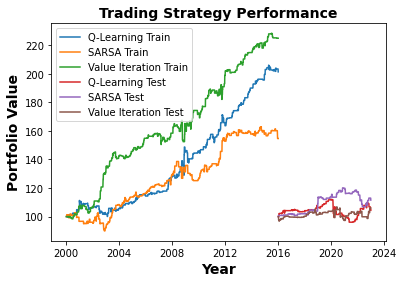

In [12]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Data Preprocessing
data = yf.download('SPY', start='2000-01-01', end='2023-01-01')
data['daily_return'] = data['Close'].pct_change()

training_data = data.loc['2000-01-01':'2015-12-31']
testing_data = data.loc['2016-01-01':]

# Here the action space is simplified to only {0, 1} - not investing or investing all-in.
# State space is the past N days returns.

N = 5
actions = [0, 1]
epsilon = 0.1
alpha = 0.5
gamma = 0.95

class SARSA:
    def __init__(self, actions, epsilon, alpha, gamma):
        self.q = defaultdict(lambda: defaultdict(lambda: 0.))
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.actions = actions

    def choose_action(self, state):
        state = str(state)
        if np.random.uniform() < self.epsilon:
            return np.random.choice(self.actions)
        else:
            return max(self.actions, key=lambda x: self.q[state][x])

    def learn(self, s, a, r, s_):
        s = str(s)
        s_ = str(s_)
        q_predict = self.q[s][a]
        if s_ != 'terminal':
            q_target = r + self.gamma * self.q[s_][self.choose_action(s_)]
        else:
            q_target = r
        self.q[s][a] += self.alpha * (q_target - q_predict)


class QLearning:
    def __init__(self, actions, epsilon, alpha, gamma):
        self.q = defaultdict(lambda: defaultdict(lambda: 0.))
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.actions = actions

    def choose_action(self, state):
        state = str(state)
        if np.random.uniform() < self.epsilon:
            return np.random.choice(self.actions)
        else:
            return max(self.actions, key=lambda x: self.q[state][x])

    def learn(self, s, a, r, s_):
        s = str(s)
        s_ = str(s_)
        q_predict = self.q[s][a]
        if s_ != 'terminal':
            if self.q[s_].values():  # Check if the sequence is not empty
                q_target = r + self.gamma * max(self.q[s_].values())
            else:
                q_target = r
        else:
            q_target = r
        self.q[s][a] += self.alpha * (q_target - q_predict)


class ValueIteration:
    def __init__(self, actions, epsilon, alpha, gamma):
        self.q = defaultdict(lambda: defaultdict(lambda: 0.))
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.actions = actions

    def choose_action(self, state):
        state = str(state)
        if np.random.uniform() < self.epsilon:
            return np.random.choice(self.actions)
        else:
            return max(self.actions, key=lambda x: self.q[state][x])

    def learn(self, s, a, r, s_):
        s = str(s)
        s_ = str(s_)
        q_predict = self.q[s][a]
        if s_ != 'terminal':
            if self.q[s_].values():  # Check if the sequence is not empty
                q_target = r + self.gamma * max(self.q[s_].values())
            else:
                q_target = r
        else:
            q_target = r
        self.q[s][a] += self.alpha * (q_target - q_predict)



# Now, initialize the ValueIteration agent along with QLearning and SARSA
value_iteration = ValueIteration(actions, epsilon, alpha, gamma)
q_learning = QLearning(actions, epsilon, alpha, gamma)
sarsa = SARSA(actions, epsilon, alpha, gamma)

agents = [q_learning, sarsa, value_iteration]

states = [training_data['daily_return'].values[i-N:i].tolist() for i in range(N, len(training_data['daily_return']))]
for i in range(N, len(training_data['daily_return'])):
    state = states[i-N]
    for agent in agents:
        action = agent.choose_action(state)
        reward = training_data['daily_return'].values[i] * action
        next_state = states[i-N+1] if i < len(training_data['daily_return']) - 1 else 'terminal'
        next_action = agent.choose_action(str(next_state)) if next_state != 'terminal' else 0
        agent.learn(state, action, reward, next_state)

# Create a time index for plotting
time_index = pd.concat([training_data, testing_data]).index[N:]

# Prepare your data arrays for portfolio values
portfolios_train = {'Q-Learning': [100.], 'SARSA': [100.], 'Value Iteration': [100.]}
portfolios_test = {'Q-Learning': [100.], 'SARSA': [100.], 'Value Iteration': [100.]}

# Populate the training data portfolios
for agent, portfolio in zip([q_learning, sarsa, value_iteration], portfolios_train.values()):
    for i in range(N, len(training_data['daily_return'])):
        state = states[i-N]
        action = agent.choose_action(state)
        reward = training_data['daily_return'].values[i] * action
        portfolio.append(portfolio[-1] * (1. + reward))

# Testing
test_states = [testing_data['daily_return'].values[i-N:i].tolist() for i in range(N, len(testing_data['daily_return']))]

# Populate the testing data portfolios
for agent, portfolio in zip([q_learning, sarsa, value_iteration], portfolios_test.values()):
    for i in range(N, len(testing_data['daily_return'])):
        state = test_states[i-N]
        action = agent.choose_action(state)
        reward = testing_data['daily_return'].values[i] * action
        portfolio.append(portfolio[-1] * (1. + reward))

# Start plotting

fig, ax = plt.subplots()

# Plot the training data portfolios
for agent, portfolio in portfolios_train.items():
    ax.plot(time_index[:len(portfolio)], portfolio, label=f'{agent} Train')

# Plot the testing data portfolios
for agent, portfolio in portfolios_test.items():
    ax.plot(time_index[-len(portfolio):], portfolio, label=f'{agent} Test')

# Decorate the plot
ax.set_xlabel('Year', fontweight="bold", fontsize="14")
ax.set_ylabel('Portfolio Value', fontweight="bold", fontsize="14")
ax.set_title("Trading Strategy Performance", fontweight="bold", fontsize="14")
ax.legend()

plt.show()
